# **TC4033.11**
# Visión computacional para imágenes y video

## Actividad 2

## Prof. Titular
Dr. Gilberto Ochoa Ruiz

## Prof.Tutor
Francisco Solorzano Domínguez

## Equipo 31
### Integrantes
* Ada Jimena Vargas Aguirre   -                 A01701619
* Irving Morales Cedeño -                       A01796208
* Juan Felipe Caro Valencia -                   A01796224
* Marco Polo Navarrete Rodríguez -              A01796238



# 2. Image Enhancement

## Table of Contents
1. [Libraries](#libraries)
2. [Histogram Equalization](#hist)
3. [Denoising with Filters](#denoising)
4. [Challenge](#challenge)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage import exposure
import skimage
from scipy.ndimage.filters import gaussian_filter as gauss
from scipy.ndimage.filters import median_filter as med
import cv2

import urllib.request

from google.colab import files
import os, glob

/tmp/ipython-input-1433764526.py:7: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter as gauss
/tmp/ipython-input-1433764526.py:8: DeprecationWarning: Please import `median_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import median_filter as med


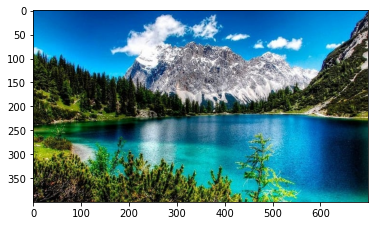

In [ ]:
original_image = Image.open('data/image.jpg')
plt.imshow(original_image)
type(original_image)

# Save the image
np.save('data/img.npy', original_image)

#Load the image
original_image = np.load('data/img.npy')

## Histogram Equalization<a class="anchor" id="hist" ></a>

Let's look at the distribution of pixel values in the image.

Ideally, the image should have relatively even distribution of values, indicating good contrast and making it easier to extract analytical information.

An easy way to check this is to plot a histogram.

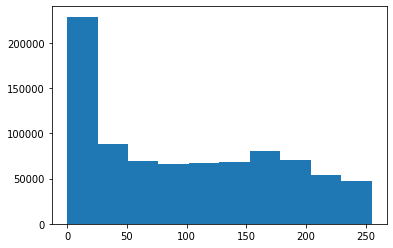

In [ ]:
# Plot a histogram - we need to use ravel to "flatten" the 3 dimensions
plt.hist(original_image.ravel())
plt.show()

Another useful way to visualize the statistics of an image is as a cumulative distribution function (CDF) plot. Which shows the cumulative pixel intensity frequencies from 0 to 255.

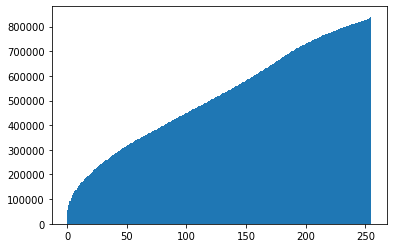

In [ ]:
plt.hist(original_image.ravel(), bins=255, cumulative=True)
plt.show()

The histogram and CDF for our image show pretty uneven distribution - there's a lot of contrast in the image. Ideally we should equalize the values in the images we want to analyse to try to make our images more consistent in terms of the shapes they contain irrespective of light levels.

Histogram equalization is often used to improve the statistics of images. In simple terms, the histogram equalization algorithm attempts to adjust the pixel values in the image to create a more uniform distribution. The code in the cell below uses the  **exposure.equalize_hist** method from the **skimage** package to equalize the image.  

c:\ProgramData\Anaconda3\envs\PhD\lib\site-packages\skimage\_shared\utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


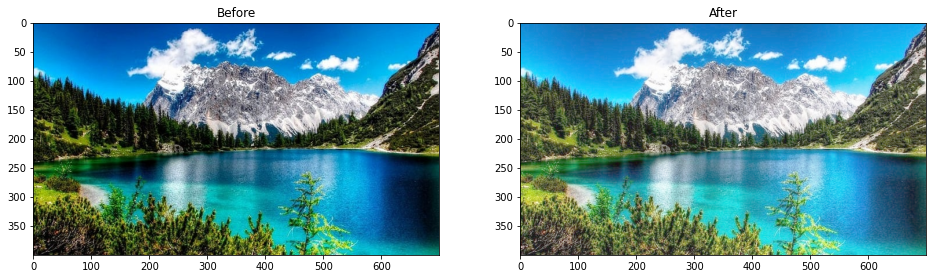

In [ ]:
original_image_eq = exposure.equalize_hist(original_image)

fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(original_image_eq)
a.set_title('After')

plt.show()

As with most image operations, there's more than one way to do this. For example, you could also use the **PIL.ImgOps.equalize** method:

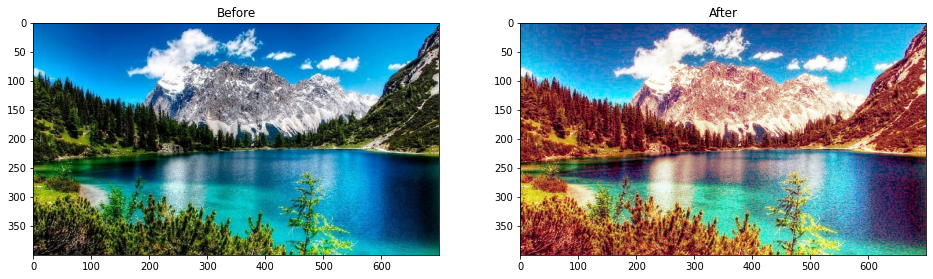

In [ ]:

# Equalize the image - but we need to convert the numpy array back to the PIL image format
image_PIL_eq = ImageOps.equalize(Image.fromarray(original_image))

# Display using matplotlib

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(image_PIL_eq)
a.set_title('After')

plt.show()

Now let's see what that's done to the histogram and CDF plots:

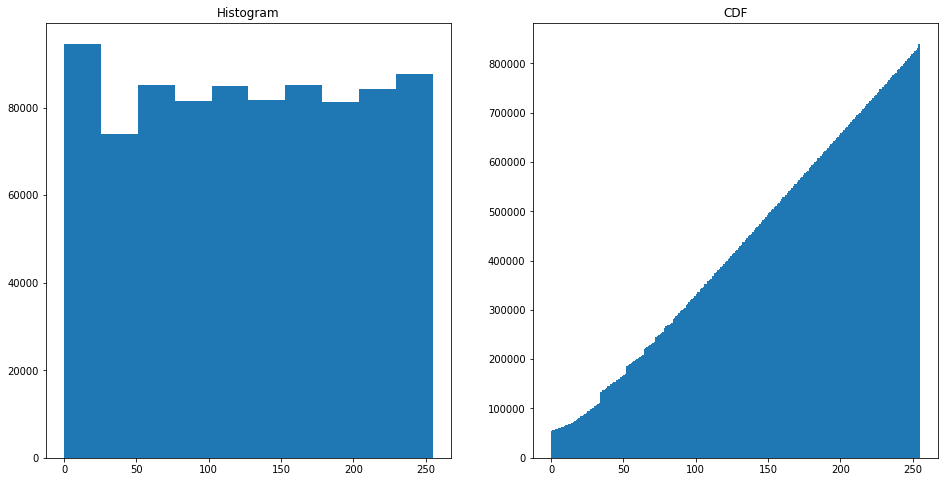

In [ ]:
# Display histograms
img_eq = np.array(image_PIL_eq)

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.hist(img_eq.ravel())
a.set_title('Histogram')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.hist(img_eq.ravel(), bins=255, cumulative=True)
a.set_title('CDF')

plt.show()

The pixel intensities are more evenly distributed in the equalized image. In particular, the cumulative density shows a straight diagonal cumulation; which is a good sign that the pixel intensity values have been equalized.

## Denoising with Filters <a class="anchor" id="denoising" ></a>

Often images need to be cleaned up to remove "salt and pepper" noise.

### Add Some Random Noise
Let's add some random noise to our image - such as you might see in a photograph taken in low light or at a low resolution.

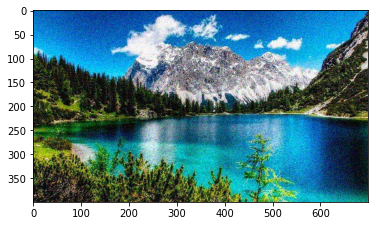

In [ ]:
img_n = skimage.util.random_noise(original_image)
plt.imshow(img_n)

### Using a Gaussian Filter
A Gaussian filter applies a weighted average (mean) value for pixels based on the pixels that surround them.

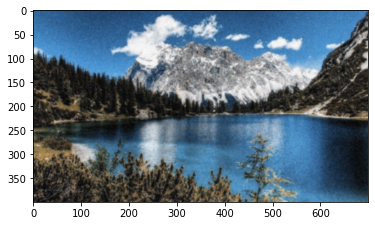

In [ ]:
img3_gauss = gauss(img_n, sigma=1)
plt.imshow(img3_gauss)

### Using a Median Filter
The Gaussian filter results in a blurred image, which may actually be better for feature extraction as it makes it easier to find contrasting areas. If it's too blurred, we could try a median filter, which as the name suggests applies the median value to pixels based on the pixels around them.

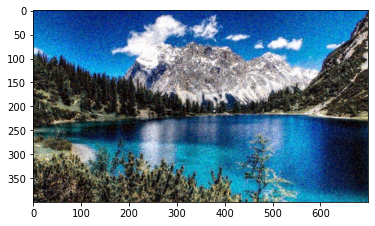

In [ ]:
img_med = med(img_n, size=2)
plt.imshow(img_med)

## Challenge <a class="anchor" id="challenge" ></a>

Now, try solving this challenge, you must equalize different windows of the same image in a splitted way.

In [ ]:
from image_slicer import slice

n = 4
slice('data/image.jpg', n)

(<Tile #1 - image_01_01.png>,
 <Tile #2 - image_01_02.png>,
 <Tile #3 - image_02_01.png>,
 <Tile #4 - image_02_02.png>)

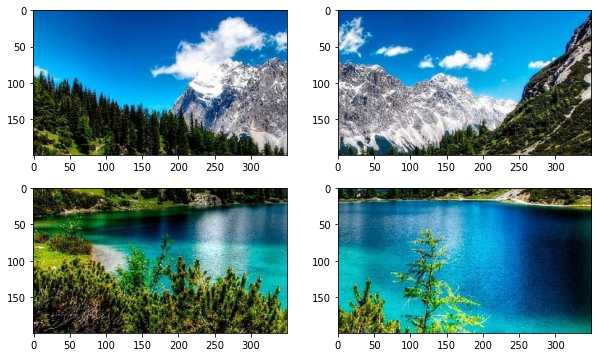

In [ ]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
img = Image.open(f'data/image_01_01.png')
plt.imshow(img)

plt.subplot(2,2,2)
img = Image.open(f'data/image_01_02.png')
plt.imshow(img)

plt.subplot(2,2,3)
img = Image.open(f'data/image_02_01.png')
plt.imshow(img)

plt.subplot(2,2,4)
img = Image.open(f'data/image_02_02.png')
plt.imshow(img)

plt.show()

Ejercicios
Se carga un dataset de kaggle que contiene defectos en la superficie de los metales.

In [ ]:
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d fantacher/neu-metal-surface-defects-data
!unzip neu-metal-surface-defects-data.zip -d neu_defects

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/fantacher/neu-metal-surface-defects-data
License(s): other
  0% 0.00/57.4M [00:00<?, ?B/s]
100% 57.4M/57.4M [00:00<00:00, 964MB/s]
Archive:  neu-metal-surface-defects-data.zip
  inflating: neu_defects/NEU Metal Surface Defects Data/Thumbs.db  
  inflating: neu_defects/NEU Metal Surface Defects Data/test/Crazing/Cr_1.bmp  
  inflating: neu_defects/NEU Metal Surface Defects Data/test/Crazing/Cr_10.bmp  
  inflating: neu_defects/NEU Metal Surface Defects Data/test/Crazing/Cr_100.bmp  
  inflating: neu_defects/NEU Metal Surface Defects Data/test/Crazing/Cr_101.bmp  
  inflating: neu_defects/NEU Metal Surface Defects Data/test/Crazing/Cr_102.bmp  
  inflating: neu_defects/NEU Metal Surface Defects Data/test/Crazing/Cr_103.bmp  
  inflating: neu_defects/NEU Metal Surface Defects Data/test/Crazing/Cr_104.bmp  
  inflating: neu_defects/NEU Metal Surface Defects Data/test/Crazing/Cr_105.bmp  
  inflating: neu_defects

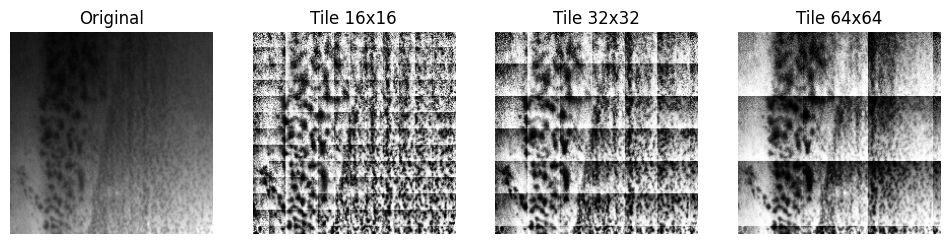

In [ ]:
#Creación de una función de tiles
def tile_based_equalization(img, tile_size=(32, 32)):
    h, w = img.shape
    tile_h, tile_w = tile_size
    out = np.zeros_like(img)

    # Recorremos por bloques
    for i in range(0, h, tile_h):
        for j in range(0, w, tile_w):
            # Definir bloque
            block = img[i:i+tile_h, j:j+tile_w]

            # Ecualización de histograma en el bloque
            eq_block = cv2.equalizeHist(block)

            # Guardar en la imagen de salida
            out[i:i+tile_h, j:j+tile_w] = eq_block

    return out

# ---- PRUEBA ----
#img = cv2.imread("ejemplo.jpg", cv2.IMREAD_GRAYSCALE)

img_path = "neu_defects/NEU Metal Surface Defects Data/test/Pitted/PS_1.bmp"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Diferentes tamaños de ventana
eq_16 = tile_based_equalization(img, (16, 16))
eq_32 = tile_based_equalization(img, (32, 32))
eq_64 = tile_based_equalization(img, (64, 64))

# Visualizar
plt.figure(figsize=(12,6))
plt.subplot(1,4,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis("off")
plt.subplot(1,4,2); plt.imshow(eq_16, cmap='gray'); plt.title("Tile 16x16"); plt.axis("off")
plt.subplot(1,4,3); plt.imshow(eq_32, cmap='gray'); plt.title("Tile 32x32"); plt.axis("off")
plt.subplot(1,4,4); plt.imshow(eq_64, cmap='gray'); plt.title("Tile 64x64"); plt.axis("off")
plt.show()


Para solucionar el problema de los bordes visibles, debido a que cada bloque se ecualiza de forma independiente, se usa interpolación entre bloques adyacentes para suavizar las transiciones. Esto es lo que se hace con CLAHE.

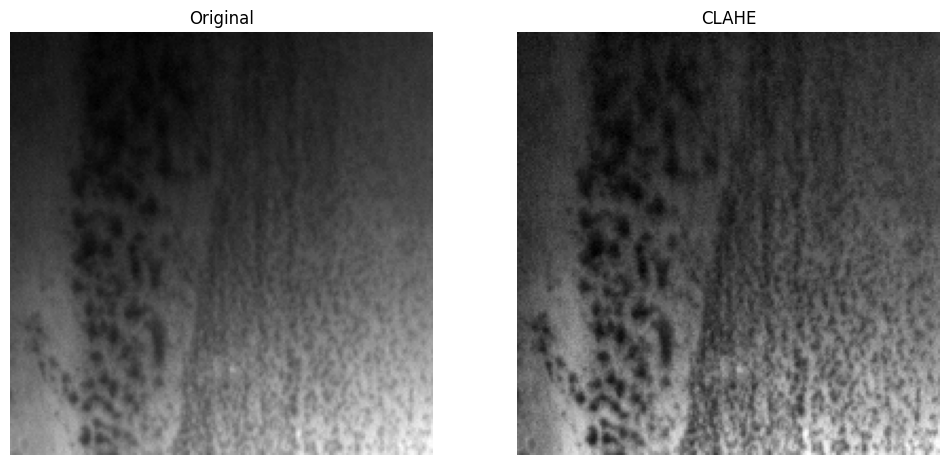

In [ ]:
# CLAHE en OpenCV
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(img)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(clahe_img, cmap='gray'); plt.title("CLAHE"); plt.axis("off")
plt.axis("off")
plt.show()

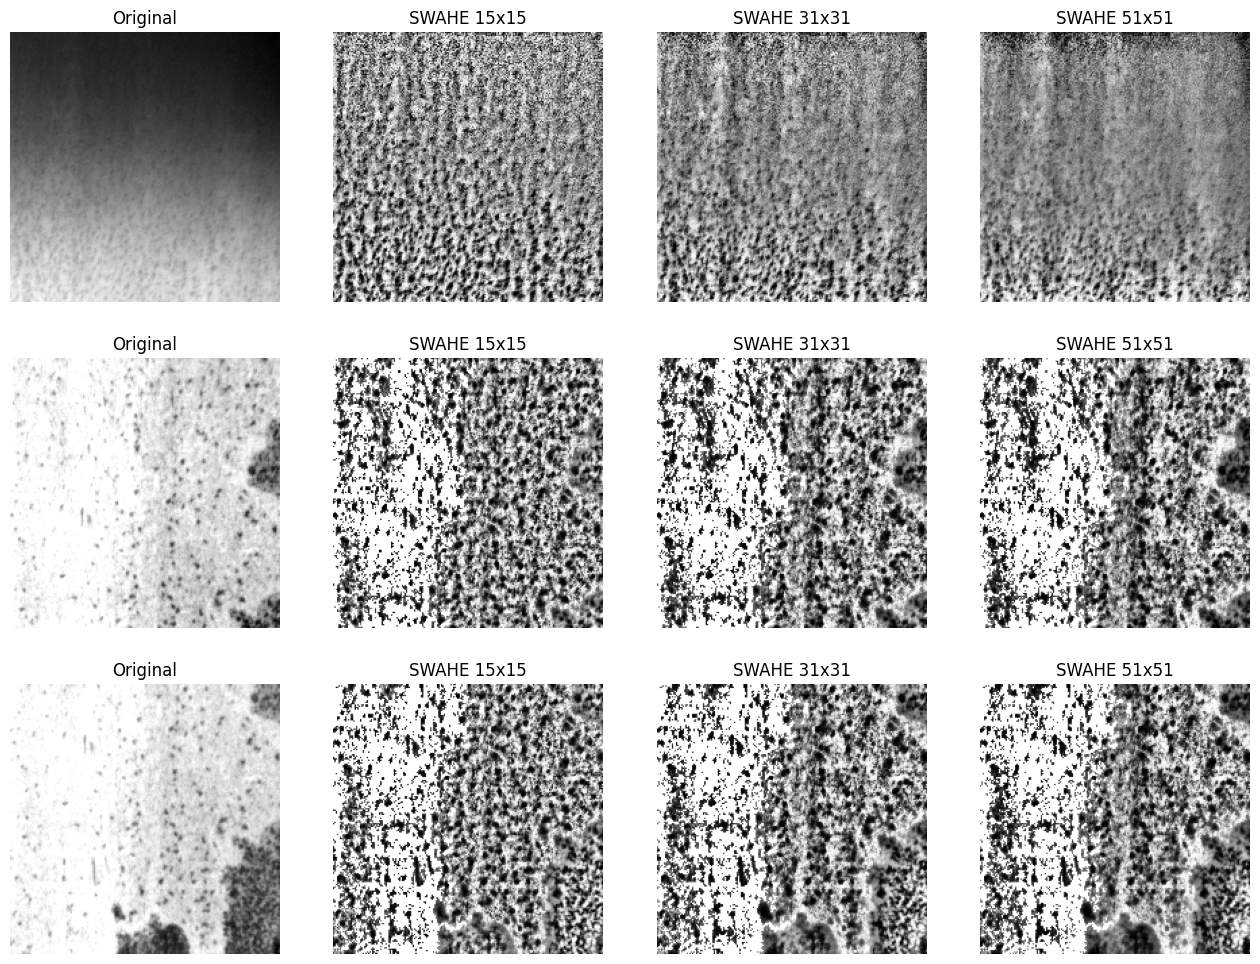

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def swahe(img, window_size=31):
    """
    Sliding Window Adaptive Histogram Equalization (SWAHE)
    img: imagen en escala de grises
    window_size: tamaño de la ventana deslizante (impar recomendado, ej: 15, 31, 51)
    """
    h, w = img.shape
    pad = window_size // 2

    # Padding para manejar bordes
    padded = cv2.copyMakeBorder(img, pad, pad, pad, pad, cv2.BORDER_REFLECT)
    out = np.zeros_like(img)

    # Para cada píxel de la imagen
    for i in range(h):
        for j in range(w):
            # Extraer la ventana local
            local_region = padded[i:i+window_size, j:j+window_size]

            # Histograma de la ventana local
            hist, bins = np.histogram(local_region.flatten(), 256, [0,256])
            cdf = hist.cumsum()
            cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min() + 1e-6)
            cdf_normalized = cdf_normalized.astype('uint8')

            # Valor ecualizado del píxel central
            out[i, j] = cdf_normalized[img[i, j]]

    return out

img_path = "neu_defects/NEU Metal Surface Defects Data/test/Pitted/PS_10.bmp"
img1 = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

img_path = "neu_defects/NEU Metal Surface Defects Data/test/Pitted/PS_100.bmp"
img2 = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

img_path = "neu_defects/NEU Metal Surface Defects Data/test/Pitted/PS_101.bmp"
img3 = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Aplicar SWAHE con distintos tamaños de ventana
swahe_img1_15 = swahe(img1, 15)
swahe_img1_31 = swahe(img1, 31)
swahe_img1_51 = swahe(img1, 51)

# Aplicar SWAHE con distintos tamaños de ventana
swahe_img2_15 = swahe(img2, 15)
swahe_img2_31 = swahe(img2, 31)
swahe_img2_51 = swahe(img2, 51)

# Aplicar SWAHE con distintos tamaños de ventana
swahe_img3_15 = swahe(img3, 15)
swahe_img3_31 = swahe(img3, 31)
swahe_img3_51 = swahe(img3, 51)

# Mostrar resultados
plt.figure(figsize=(16,12))
plt.subplot(3,4,1); plt.imshow(img1, cmap="gray"); plt.title("Original"); plt.axis("off")
plt.subplot(3,4,2); plt.imshow(swahe_img1_15, cmap="gray"); plt.title("SWAHE 15x15"); plt.axis("off")
plt.subplot(3,4,3); plt.imshow(swahe_img1_31, cmap="gray"); plt.title("SWAHE 31x31"); plt.axis("off")
plt.subplot(3,4,4); plt.imshow(swahe_img1_51, cmap="gray"); plt.title("SWAHE 51x51"); plt.axis("off")

plt.subplot(3,4,5); plt.imshow(img2, cmap="gray"); plt.title("Original"); plt.axis("off")
plt.subplot(3,4,6); plt.imshow(swahe_img2_15, cmap="gray"); plt.title("SWAHE 15x15"); plt.axis("off")
plt.subplot(3,4,7); plt.imshow(swahe_img2_31, cmap="gray"); plt.title("SWAHE 31x31"); plt.axis("off")
plt.subplot(3,4,8); plt.imshow(swahe_img2_51, cmap="gray"); plt.title("SWAHE 51x51"); plt.axis("off")

plt.subplot(3,4,9); plt.imshow(img3, cmap="gray"); plt.title("Original"); plt.axis("off")
plt.subplot(3,4,10); plt.imshow(swahe_img3_15, cmap="gray"); plt.title("SWAHE 15x15"); plt.axis("off")
plt.subplot(3,4,11); plt.imshow(swahe_img3_31, cmap="gray"); plt.title("SWAHE 31x31"); plt.axis("off")
plt.subplot(3,4,12); plt.imshow(swahe_img3_51, cmap="gray"); plt.title("SWAHE 51x51"); plt.axis("off")

plt.show()


CLAHE VS SWAHE VS HISTOGRAM EQUALIZATION

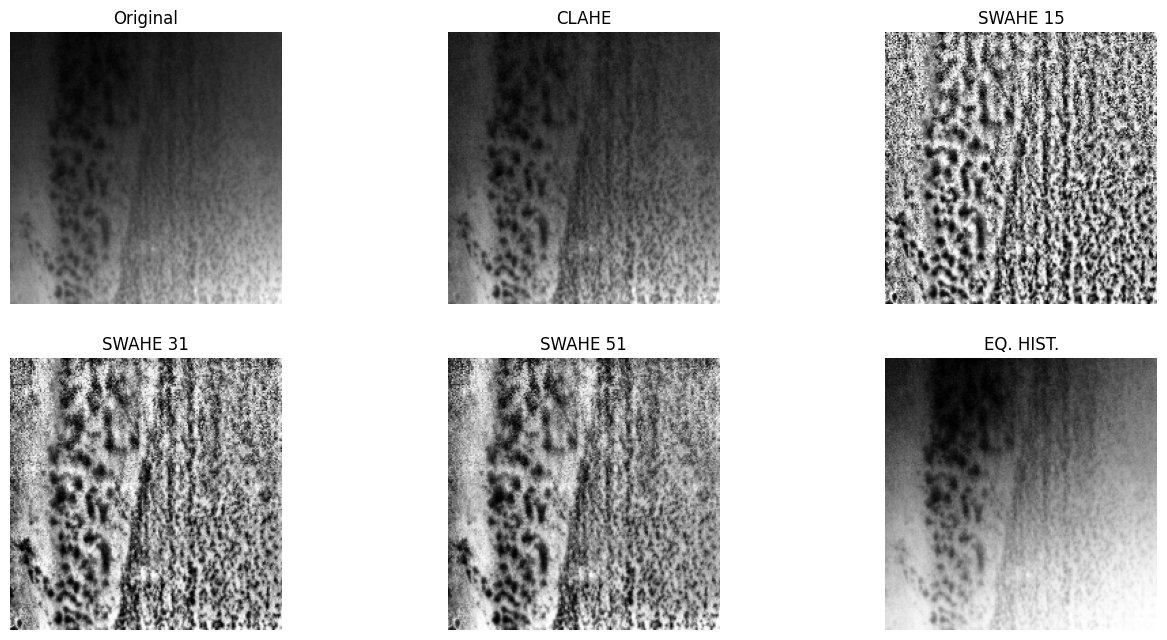

In [ ]:
img_path = "neu_defects/NEU Metal Surface Defects Data/test/Pitted/PS_1.bmp"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(img)

swahe_img_15 = swahe(img, 15)
swahe_img_31 = swahe(img, 31)
swahe_img_51 = swahe(img, 51)

img_eq = cv2.equalizeHist(img)

plt.figure(figsize=(16,12))
plt.subplot(3,3,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis("off")
plt.subplot(3,3,2); plt.imshow(clahe_img, cmap='gray'); plt.title("CLAHE"); plt.axis("off")
plt.subplot(3,3,3); plt.imshow(swahe_img_15, cmap='gray'); plt.title("SWAHE 15"); plt.axis("off")
plt.subplot(3,3,4); plt.imshow(swahe_img_31, cmap='gray'); plt.title("SWAHE 31"); plt.axis("off")
plt.subplot(3,3,5); plt.imshow(swahe_img_51, cmap='gray'); plt.title("SWAHE 51"); plt.axis("off")
plt.subplot(3,3,6); plt.imshow(img_eq, cmap='gray'); plt.title("EQ. HIST."); plt.axis("off")
plt.axis("off")
plt.show()

Equalización global → rápida, útil cuando el problema es bajo contraste en toda la imagen.

CLAHE → ideal en imágenes con variaciones locales y con riesgo de ruido.

SWAHE → cuando se requiere el mejor detalle posible y se puede pagar el costo computacional.

🔹 1. Equalización de histograma (global)

Qué hace: Ajusta el contraste considerando toda la imagen como un solo bloque.

Ventaja: Método rápido y simple, mejora imágenes con bajo contraste global.

Limitación: Puede saturar detalles locales o introducir ruido si la iluminación es muy variable.

Ejemplos en manufactura:

Mejorar imágenes de inspección de piezas metálicas donde toda la superficie se ve opaca o poco contrastada por reflejos.

Preprocesar imágenes en sistemas de lectura de códigos impresos (barras, QR) en empaques oscuros o mal iluminados. (Jimenez2008).

🔹 2. CLAHE (Contrast Limited Adaptive Histogram Equalization)

Qué hace: Divide la imagen en mosaicos (tiles), ecualiza cada región y aplica un límite al contraste para evitar la sobreexposición de ruido.

Ventaja: Realza detalles locales sin amplificar tanto el ruido.

Ejemplos en manufactura:

Detección de microgrietas en soldaduras o circuitos impresos (PCBs): mejora el contraste de fisuras muy pequeñas.

Inspección de calidad en empaques plásticos transparentes: permite resaltar bordes y arrugas que en iluminación normal son difíciles de ver.

Control de calidad en textiles o fibras: ayuda a identificar defectos en el tejido o impurezas. (Setiawan2013)

🔹 3. SWAHE (Sliding Window Adaptive Histogram Equalization)

Qué hace: Similar al CLAHE, pero la ventana se mueve pixel a pixel (no en bloques fijos). Da un resultado más suave entre regiones, aunque es más costoso computacionalmente.

Ventaja: Muy buen balance entre detalle y suavidad, sin los bordes entre mosaicos que puede dar CLAHE.

Ejemplos en manufactura:

Inspección superficial en acero, aluminio u otros metales pulidos: mejora visibilidad de inclusiones o ralladuras leves.

Visión para robots de ensamblaje de precisión: realza detalles en piezas pequeñas o parcialmente iluminadas.

Inspección de vidrio o cerámica: resalta burbujas o defectos microscópicos en la superficie.(Sund2006)

📚 Bibliography & references

* Jimenez, M. M. (2008). Introducción al tratamiento Digital y Clustering de imágenes. REE Marzo, 86-89. https://www.researchgate.net/profile/Juan-Manuel-Miguel-Jimenez/publication/28206651_Introduccion_al_Tratamiento_Digital_y_Clustering_de_imagenes/links/09e41513909a8f1e15000000/Introduccion-al-Tratamiento-Digital-y-Clustering-de-imagenes.pdf

* Setiawan, A. W., Mengko, T. R., Santoso, O. S., & Suksmono, A. B. (2013, June). Color retinal image enhancement using CLAHE. In International conference on ICT for smart society (pp. 1-3). IEEE. https://www.researchgate.net/profile/Andriyan-Suksmono/publication/261196086_Color_retinal_image_enhancement_using_CLAHE/links/54fd6c680cf270426d1240eb/Color-retinal-image-enhancement-using-CLAHE.pdf

* Sund, T., & Møystad, A. (2006). Sliding window adaptive histogram equalization of intraoral radiographs: effect on image quality. Dentomaxillofacial Radiology, 35(3), 133-138. https://www.researchgate.net/profile/Torbjorn-Sund/publication/7161092_Sliding_window_adaptive_histogram_equalization_of_intraoral_radiographs_Effect_on_image_quality/links/588f1950a6fdcc8e63cbbe6e/Sliding-window-adaptive-histogram-equalization-of-intraoral-radiographs-Effect-on-image-quality.pdf



